# Apply Classification technique KNN on Amazon Food Reviews

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Using sqlite3 connect to database which Amazon Dataset

In [2]:
#connecting to database where Amazon food reviews are present
connection = sqlite3.connect('D:\\AI_stuff\\dataset\\Amazon food reviews\\database.sqlite')

food_data = pd.read_sql_query('select * from reviews',connection)

food_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [3]:
food_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Giving score as positive or negative based on score
food_reviews = pd.read_sql_query('select * from reviews where score != 3',connection)

posneg = list(map(lambda x:'Positive' if x >3 else 'Negative',food_reviews['Score']))
food_reviews['Score'] = posneg

food_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<b> Drop the duplicates

In [5]:
import datetime

food_reviews['Time'] = food_reviews['Time'].map(lambda t: datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S'))

food_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,2011-04-27 05:30:00,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,2012-09-07 05:30:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,2008-08-18 05:30:00,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,2011-06-13 05:30:00,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,2012-10-21 05:30:00,Great taffy,Great taffy at a great price. There was a wid...


<b> We have time column then apply time based splitting on this data set

In [6]:
#Removing the duplictaes
sort_data = food_reviews.sort_values('ProductId')

remove_duplicates = sort_data.drop_duplicates(subset = {'UserId' , 'ProfileName' , 'Time' , 'Text'} , keep = 'first')

remove_duplicates.shape

(364173, 10)

<b> Check the Null Values if has then use fill the null values

In [7]:
#checking null values
remove_duplicates.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

<b> Helpfullness Numerator should be less than Helpfullness Denominator

In [8]:
final_reviews = remove_duplicates[remove_duplicates['HelpfulnessNumerator'] <= remove_duplicates['HelpfulnessDenominator']]

final_reviews.shape

(364171, 10)

<b> Take the sample data from population because of large data set

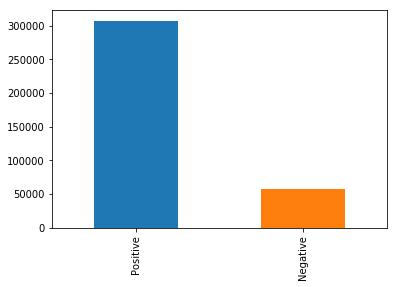

In [9]:
final_reviews['Score'].value_counts().plot(kind = 'bar')

In [10]:
positive = final_reviews[final_reviews['Score'] == 'Positive']
negative = final_reviews[final_reviews['Score'] == 'Negative']

positive = positive.sample(frac = 0.035,random_state = 1)
negative = negative.sample(frac = 0.15,random_state = 1)

final_reviews = pd.concat([positive,negative],axis=0)

final_reviews = final_reviews.sort_values('Time', axis = 0 , kind = 'quicksort').reset_index(drop = 'true')

final_reviews.shape

(19313, 10)

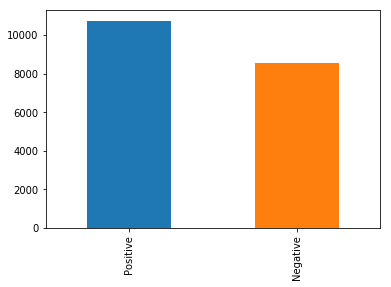

In [11]:
final_reviews['Score'].value_counts().plot(kind = 'bar')

In [12]:
final_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,Negative,2000-01-19 05:30:00,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very..."
1,374408,B00004CI84,A1GB1Q193DNFGR,Bruce Lee Pullen,5,5,Positive,2000-10-03 05:30:00,Fabulous Comedic Fanasy Directed by a Master,Beetlejuice is an awe-inspiring wonderfully am...
2,374342,B00004CI84,A10L8O1ZMUIMR2,G. Kleinschmidt,61,79,Negative,2002-12-27 05:30:00,Great movie turned bad,"Just to let you know, this movie is one of my ..."
3,479736,B00005U2FA,A1UUIV2251UKHJ,S. McMillian,2,2,Positive,2003-05-06 05:30:00,Vacu Vin,Although this was a gift to use for keeping wi...
4,194858,B0000E65WB,A2VZ11U5DXM8J5,"C. Ebeling ""ctlpareader""",1,1,Positive,2003-11-09 05:30:00,Stock Up On This Item,I usually purchase this item in smaller links ...


<h2> 1.Remove Stopwords<br>
2.Remove htmltags and punctuation<br>
3.snowball stemming<br>
4.covert to lower case

In [13]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [14]:
stop_words = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')
def cleanhtml(sent):
    cleanr = re.compile("<.*?/")
    cleantags = re.sub(cleanr,'',sent)
    return cleantags
def cleanpunc(sent):
    cleanp = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleantext = re.sub(r'[.|,|(|)|\|/]',r'',cleanp)
    return cleantext
i=0
final_review = []
all_pos_val = []
all_neg_val = []

for sent in final_reviews['Text'].values:
    filter_sent = []
    sent = cleanhtml(sent)
    for text in sent.split():
        for cleanwords in cleanpunc(text).split():
            if(cleanwords.isalpha()):
                if(cleanwords.lower() not in stop_words):
                    s = (sno.stem(cleanwords.lower())).encode('utf8')
                    filter_sent.append(s)
                    if((final_reviews['Score'].values)[i] == 'Positive'):
                        all_pos_val.append(s)
                    if((final_reviews['Score'].values)[i] == 'Negative'):
                        all_neg_val.append(s)    
                else:
                    continue
            else:
                continue
     
    str1 = b"".join(filter_sent)
    final_review.append(str1)
    i += 1  

In [15]:
final_reviews['FinalText'] = final_review
final_reviews['FinalText'] = final_reviews['FinalText'].str.decode('utf-8')

In [16]:
con  = sqlite3.connect('final_reviews.sqlite')

c = con.cursor()
con.text_factory = str

final_reviews.to_sql('Reviews', con,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation
def find_optimal_k(X_train,y_train,list_range):
    neighbors = []
    for i in list_range:
        if i % 2 != 0:
            neighbors.append(i)

    cv_scores = []
    
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors = k)
        cv  = cross_val_score(knn,X_train,y_train,cv = 10,scoring ='accuracy')
        cv_scores.append(cv.mean())
        
    MSE = [1-x for x in cv_scores]
    
    optimal_k = neighbors[MSE.index(min(MSE))]
    print(" The optimal K value is {}".format(optimal_k))
    
    plt.plot(neighbors,MSE)
    plt.show()
    
    return optimal_k

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature Extraction for Text to Numeric



# Apply Bag Of Words on KNN

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

final_bow = CountVectorizer().fit_transform(final_reviews['FinalText'])


In [19]:
from sklearn.preprocessing import StandardScaler

final_bow_standard = StandardScaler(with_mean = False).fit_transform(final_bow)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
#Now lets take train and test data as 80 and 20

import math

X = final_bow_standard

y = final_reviews['Score']

X_train =  X[:math.ceil(len(final_reviews)*.7)] 
X_test = X[math.ceil(len(final_reviews)*.7):]
y_train = y[:math.ceil(len(final_reviews)*.7)]
y_test =  y[math.ceil(len(final_reviews)*.7):]


 The optimal K value is 31


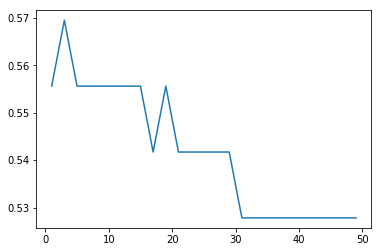

In [21]:
list1 = list(range(1,50))
optimal_k = find_optimal_k(X_train,y_train,list1)

In [22]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

knn.fit(X_train,y_train)

pred= knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

   Negative       0.47      1.00      0.64      2746
   Positive       0.00      0.00      0.00      3047

avg / total       0.22      0.47      0.30      5793



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
print("Accuracy for Food Reviews for Bag Of Words",round(accuracy_score(y_test,pred)*100,1))

Accuracy for Food Reviews for Bag Of Words 47.4


# Apply TF-IDF on KNN

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

final_tfidf = TfidfVectorizer(ngram_range=(1,2)).fit(final_reviews['FinalText']).transform(final_reviews['FinalText'])

In [26]:
final_tfidf_standard = StandardScaler(with_mean = False).fit_transform(final_tfidf)

In [27]:
#Now lets take train and test data as 80 and 20

import math

X = final_tfidf_standard

y = final_reviews['Score']

X_train =  X[:math.ceil(len(final_reviews)*.7)] 
X_test = X[math.ceil(len(final_reviews)*.7):]
y_train = y[:math.ceil(len(final_reviews)*.7)]
y_test =  y[math.ceil(len(final_reviews)*.7):]


 The optimal K value is 31


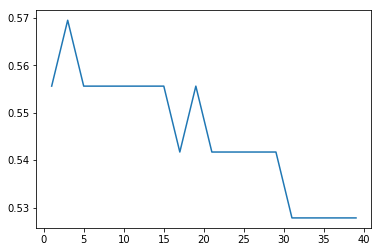

31

In [28]:
list1 = list(range(1,40))
find_optimal_k(X_train,y_train,list1)

In [29]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

# Classfication Reports

In [30]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

   Negative       0.47      1.00      0.64      2746
   Positive       0.00      0.00      0.00      3047

avg / total       0.22      0.47      0.30      5793



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
print("Accuracy for TFIDF on KNN",round(accuracy_score(y_test,pred)*100,2))

Accuracy for TFIDF on KNN 47.4


# Apply Word2Vec on KNN

In [32]:
list_sent = []

for word in final_reviews['FinalText'].values:
    list_sent.append(word)
    
print(list_sent[0])    

alwayenjoymovifunnientertaindidnthesitpickclamsheleditguessmarketplanmakemovifamilisometheliminstrongprofanelementusualedittelevisversionwarnwantuncutversionavoidclamsheledit


In [33]:
import gensim

from gensim.models import Word2Vec

D:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [34]:
Word2VecModel = Word2Vec(list_sent,min_count = 5,workers = 10,size = 100)

In [35]:
word2vec = Word2VecModel[Word2VecModel.wv.vocab]

print(word2vec.shape)

print(word2vec[0])

(26, 100)
[ 1.33045718e-01  1.86852999e-02 -1.09792771e-02  1.64925568e-02
 -2.21133709e-01  8.17902088e-02 -2.28329509e-01  8.59450623e-02
  2.72587687e-01 -1.38506263e-01 -1.47865087e-01 -1.86906457e-01
  4.56900716e-01 -1.06724247e-01  1.00847393e-01 -1.68457448e-01
  7.91597217e-02  1.34649038e-01  3.73908341e-01  1.09310009e-01
  2.08423771e-02  2.48619094e-01  1.16986737e-01  1.28837660e-01
  4.85634953e-02  1.94379482e-02  9.85540599e-02  1.15187708e-02
 -6.51157051e-02  3.36910523e-02  3.88316773e-02 -4.33646999e-02
  3.74181062e-01 -1.57801494e-01 -2.55902201e-01  4.83607240e-02
 -8.98532197e-02 -1.01999566e-02  1.07802667e-01 -9.75191742e-02
 -4.43236530e-02  1.44625068e-01 -1.97982758e-01  1.63920149e-01
 -1.43918648e-01 -1.81035429e-01 -3.07492882e-01 -5.97677715e-02
  1.09881815e-02 -1.63854614e-01 -1.22896545e-01  2.93546100e-03
 -9.80567411e-02 -9.32491124e-02  1.04703076e-01 -3.24914813e-01
  1.65449947e-01 -1.82918832e-01 -2.93890983e-01  3.65157686e-02
 -1.00388020e-0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in word2vec:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [37]:
X = sent_vectors

y = final_reviews['Score']


X_train =  X[:math.ceil(len(final_reviews)*.7)] 
X_test = X[math.ceil(len(final_reviews)*.7):]
y_train = y[:math.ceil(len(final_reviews)*.7)]
y_test =  y[math.ceil(len(final_reviews)*.7):]

print(type(X_train))

<class 'list'>


 The optimal K value is 1


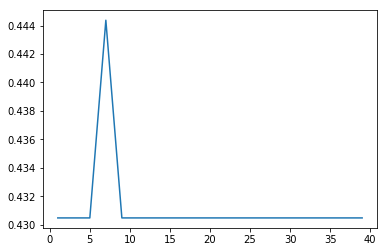

1

In [38]:
list1 = list(range(1,40))

find_optimal_k(X_train,y_train,list1)

In [39]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

<b>Classification Report

In [40]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00      2746
   Positive       0.53      1.00      0.69      3047

avg / total       0.28      0.53      0.36      5793



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print("acuuracy Score of Amazon food reviews by Word2vec on KNN", round(accuracy_score(y_test,pred)*100,2))

acuuracy Score of Amazon food reviews by Word2vec on KNN 52.6


# Weighted Word2Vec on KNN

In [42]:
#tfidf_features = TfidfVectorizer(ngram_range = (1,2)).get_feature_names()
tfidf_sent_vectors = []
rows=0
for word in list_sent:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for sent in word:
        if sent in word2vec:
            vec = w2v_model.wv[sent]
            tfidf = final_tfidf [rows, tfidf_feat.index(word)]
            sent_vec += (vec* tfidf)
            weight_sum += tfidf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    rows += 1
            

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [43]:
X = tfidf_sent_vectors

y = final_reviews['Score']


X_train =  X[:math.ceil(len(final_reviews)*.7)] 
X_test = X[math.ceil(len(final_reviews)*.7):]
y_train = y[:math.ceil(len(final_reviews)*.7)]
y_test =  y[math.ceil(len(final_reviews)*.7):]


 The optimal K value is 1


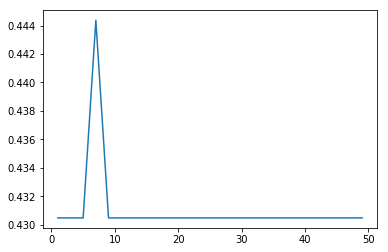

1

In [44]:
list1 = list(range(1,50))

find_optimal_k(X_train , y_train , list1)

In [45]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

<b> Classification Report

In [46]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00      2746
   Positive       0.53      1.00      0.69      3047

avg / total       0.28      0.53      0.36      5793



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
print(round(accuracy_score(y_test,pred)*100,2))

52.6
